In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob

In [2]:
raw_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/interim/'
figures_dir = '/home/grace/Documents/python/ttc_inhalation/reports/figures/'

In [3]:
xls = pd.ExcelFile(processed_dat_dir+'ttc_moa_v1.xlsx')

In [4]:
xls.sheet_names

['ttc_moa_v1']

In [5]:
ttc_moa_df = xls.parse('ttc_moa_v1')

In [6]:
ttc_moa_df.head()

,Unnamed: 0,DTXSID,min_toxval_mgm3_adj,Cramer_class,Aquatic_OASIS,Verhaar,log_min_toxval_mgm3_adj,Verhaar_toxtree,OASIS_v2,consensus_MOA
0,0,DTXSID0020315,0.005000,ClassIII,baseline_narcotic,unclassified,-2.301030,unclassified,baseline_narcotic,unclassified
1,1,DTXSID0020446,0.683333,ClassIII,baseline_narcotic,reactive,-0.165367,unclassified,baseline_narcotic,reactive
2,2,DTXSID0021096,9.800000,ClassIII,reactive,unclassified,0.991226,unclassified,reactive,unclassified
3,3,DTXSID0021381,550.382960,ClassIII,baseline_narcotic,baseline_narcotic,2.740665,baseline_narcotic,baseline_narcotic,baseline_narcotic
4,4,DTXSID0021383,24.750000,ClassIII,baseline_narcotic,baseline_narcotic,1.393575,baseline_narcotic,baseline_narcotic,baseline_narcotic


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [8]:
ttc_moa_df['Verhaar'].value_counts(dropna = False)

unclassified         220
baseline_narcotic    169
reactive             108
polar_narcotic        15
specific_acting        7
Name: Verhaar, dtype: int64

In [9]:
ttc_moa_df['Verhaar_toxtree'].value_counts(dropna = False)

unclassified         241
baseline_narcotic    200
reactive              48
polar_narcotic        28
Missing                2
Name: Verhaar_toxtree, dtype: int64

In [10]:
print(classification_report(ttc_moa_df['Verhaar_toxtree'],ttc_moa_df['Verhaar']))

                   precision    recall  f1-score   support

          Missing       0.00      0.00      0.00         2
baseline_narcotic       0.90      0.76      0.82       200
   polar_narcotic       0.67      0.36      0.47        28
         reactive       0.31      0.71      0.44        48
  specific_acting       0.00      0.00      0.00         0
     unclassified       0.80      0.73      0.76       241

         accuracy                           0.71       519
        macro avg       0.45      0.43      0.41       519
     weighted avg       0.78      0.71      0.74       519



/home/grace/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grace/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
sorted(ttc_moa_df['Verhaar'].unique())

['baseline_narcotic',
 'polar_narcotic',
 'reactive',
 'specific_acting',
 'unclassified']

In [12]:
sorted(ttc_moa_df['Verhaar_toxtree'].unique())

['Missing', 'baseline_narcotic', 'polar_narcotic', 'reactive', 'unclassified']

In [13]:
labels = ['Missing', 'baseline_narcotic', 'polar_narcotic', 'reactive', 'specific_acting','unclassified']

In [14]:
print(confusion_matrix( ttc_moa_df['Verhaar_toxtree'],ttc_moa_df['Verhaar'], labels))

[[  0   0   0   0   2   0]
 [  0 152   0  21   0  27]
 [  0   5  10   4   0   9]
 [  0   1   0  34   4   9]
 [  0   0   0   0   0   0]
 [  0  11   5  49   1 175]]


In [15]:
xticklabels = ttc_moa_df['Verhaar'].unique()
yticklabels = ttc_moa_df['Verhaar_toxtree'].unique()

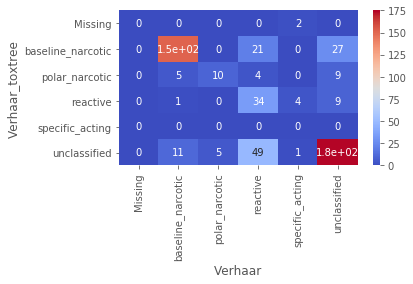

In [17]:
plt.style.use('ggplot')
ax= plt.subplot()
sns.heatmap(confusion_matrix( ttc_moa_df['Verhaar_toxtree'],ttc_moa_df['Verhaar'] ),xticklabels = labels, yticklabels = labels , annot = True, ax = ax, cmap = 'coolwarm')
ax.set_xlabel('Verhaar');ax.set_ylabel('Verhaar_toxtree')
plt.tight_layout()
plt.savefig(figures_dir+'hm_verhaar_revised.jpg', dpi = 300)

In [18]:
cramer = pd.read_csv()

TypeError: parser_f() missing 1 required positional argument: 'filepath_or_buffer'

In [19]:
cramer_all = pd.DataFrame()
for f in glob.glob(processed_dat_dir+'*mgm3.csv'):
    df = pd.read_csv(f, sep = ',')
    cramer_all = cramer_all.append(df, ignore_index = True)

In [20]:
cramer_all.to_csv(processed_dat_dir+'cramer_all.csv')

In [21]:
cramer_txps = pd.read_csv(processed_dat_dir+'cramer_all_txps.csv', sep = '\t')

In [22]:
cramer_txps.drop(['INPUT', 'PREFERRED_NAME'], axis = 1, inplace = True)

In [23]:
cramer_txps['source'] ='ToxVal'

In [24]:
carthew = pd.read_csv(raw_dat_dir+'Carthew_2009_Appendix_A_ToxPrints.tsv', sep = '\t')

In [25]:
carthew = carthew[carthew['atom:element_main_group'] != '-']

In [26]:
carthew.drop(['INPUT', 'PREFERRED_NAME'], axis = 1, inplace = True)

In [27]:
carthew['source'] = 'Carthew'

In [28]:
escher = pd.read_csv(raw_dat_dir+'Escher_2010_Appendix_A_ToxPrints.tsv', sep = '\t')

In [29]:
escher = escher[escher['atom:element_main_group'] != '-']

In [30]:
escher.drop(['INPUT', 'PREFERRED_NAME'], axis = 1, inplace = True)

In [31]:
escher['source'] = 'Escher'

In [32]:
df = pd.concat([cramer_txps, carthew, escher], axis =0)

In [33]:
df

,DTXSID,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,source
0,DTXSID0020315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ToxVal
1,DTXSID0020446,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ToxVal
2,DTXSID0021096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ToxVal
3,DTXSID0021381,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ToxVal
4,DTXSID0021383,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ToxVal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,DTXSID9020407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Escher
199,DTXSID7020267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Escher
200,DTXSID9025536,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Escher
201,DTXSID5035957,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Escher


In [34]:
from sklearn.manifold import TSNE

In [35]:
model_txps = TSNE(learning_rate = 200)

In [36]:
df = df[df['atom:element_main_group'] != '-']

In [37]:

tsne_features = model_txps.fit_transform(df.iloc[:,1:-1])

In [38]:
tsne_features

array([[-32.721798, -15.227309],
       [-16.14118 , -16.00431 ],
       [ 14.141557,  -9.159535],
       ...,
       [ -9.196258,  -9.120641],
       [-19.78033 , -27.297869],
       [-36.33935 , -17.12081 ]], dtype=float32)

In [39]:
df2 = df.set_index('DTXSID')

In [40]:
tsne_df=pd.concat([pd.DataFrame(tsne_features, index = df2.index, columns = ['tsne_x', 'tsne_y']), df2['source']],axis =1)


In [41]:
tsne_df = tsne_df.reset_index()

In [43]:
tsne_df

,DTXSID,tsne_x,tsne_y,source
0,DTXSID0020315,-32.721798,-15.227309,ToxVal
1,DTXSID0020446,-16.141180,-16.004311,ToxVal
2,DTXSID0021096,14.141557,-9.159535,ToxVal
3,DTXSID0021381,-31.513599,-14.716935,ToxVal
4,DTXSID0021383,-26.211208,3.659273,ToxVal
...,...,...,...,...
796,DTXSID9020407,-0.617926,-10.109094,Escher
797,DTXSID7020267,-37.754974,-19.075003,Escher
798,DTXSID9025536,-9.196258,-9.120641,Escher
799,DTXSID5035957,-19.780331,-27.297869,Escher


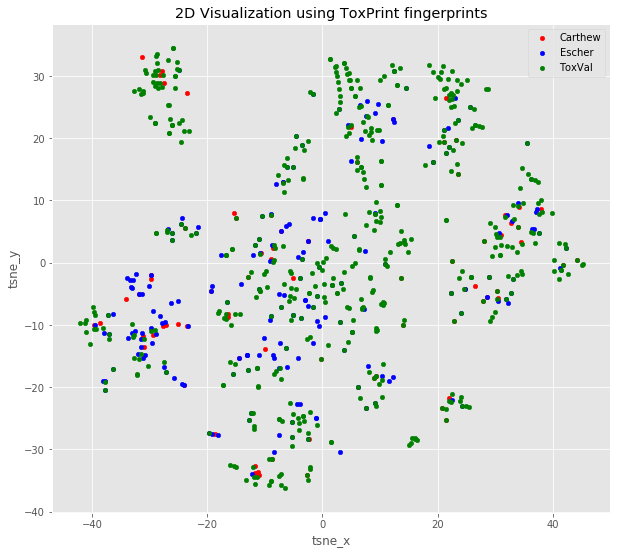

In [45]:
fig, ax = plt.subplots(figsize = (10,9))

colors = {'ToxVal':'green','Carthew':'red', 'Escher': 'blue'}

grouped = tsne_df .groupby('source')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', label=key, color=colors[key])
plt.title('2D Visualization using ToxPrint fingerprints')
plt.savefig(figures_dir+'TxP_2D_Landscape.jpg', dpi = 300)